In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [5]:
file_path = 'Student_performance_data _.csv'
df = pd.read_csv(file_path)


df['GPA_binned'] = pd.cut(df['GPA'], bins=5, labels=False)

X = df[['StudyTimeWeekly', 'Absences']]
y = df['GPA_binned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.66
Precision: 0.67
Recall: 0.66
F1-score: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.58      0.65        97
           1       0.62      0.70      0.65       184
           2       0.66      0.63      0.64       198
           3       0.68      0.75      0.71       177
           4       0.72      0.58      0.64        62

    accuracy                           0.66       718
   macro avg       0.68      0.65      0.66       718
weighted avg       0.67      0.66      0.66       718



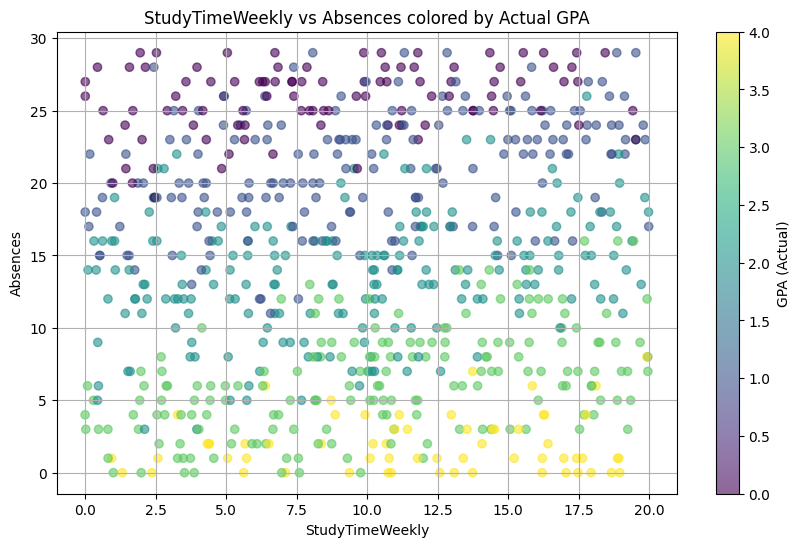

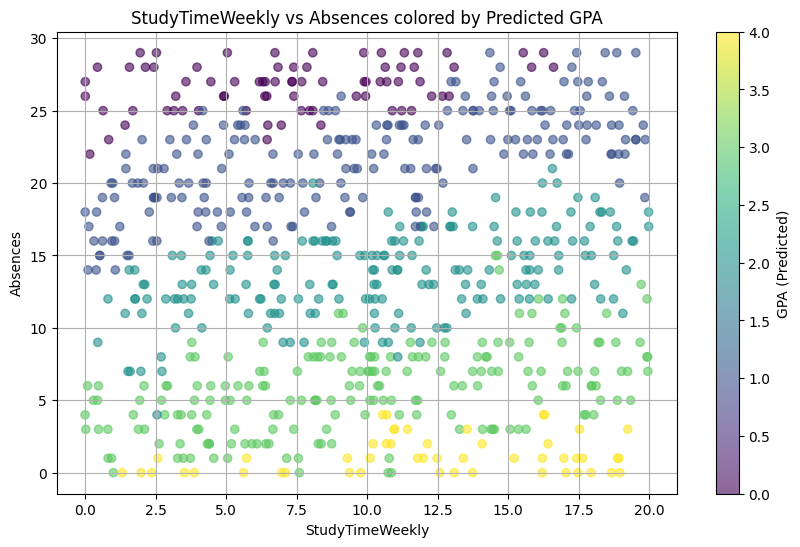

In [26]:
y_test_numeric = pd.Categorical(y_test).codes
y_pred_numeric = pd.Categorical(y_pred).codes

plt.figure(figsize=(10, 6))
scatter_actual = plt.scatter(X_test['StudyTimeWeekly'], X_test['Absences'], c=y_test_numeric, cmap='viridis', alpha=0.6)
plt.colorbar(scatter_actual, label='GPA (Actual)')
plt.xlabel('StudyTimeWeekly')
plt.ylabel('Absences')
plt.title('StudyTimeWeekly vs Absences colored by Actual GPA')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
scatter_pred = plt.scatter(X_test['StudyTimeWeekly'], X_test['Absences'], c=y_pred_numeric, cmap='viridis', alpha=0.6)
plt.colorbar(scatter_pred, label='GPA (Predicted)')
plt.xlabel('StudyTimeWeekly')
plt.ylabel('Absences')
plt.title('StudyTimeWeekly vs Absences colored by Predicted GPA')
plt.grid(True)
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

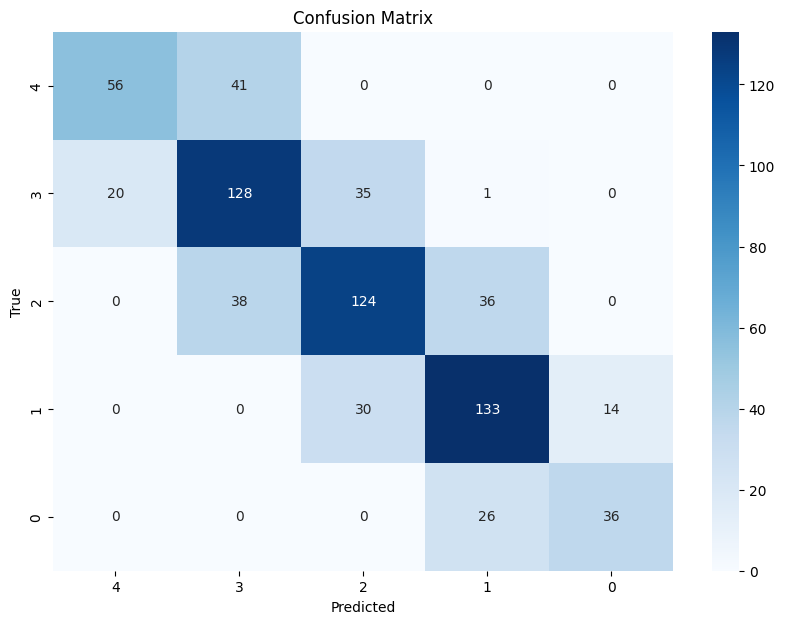

In [28]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['4', '3', '2', '1', '0'], yticklabels=['4', '3', '2', '1', '0'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()